11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


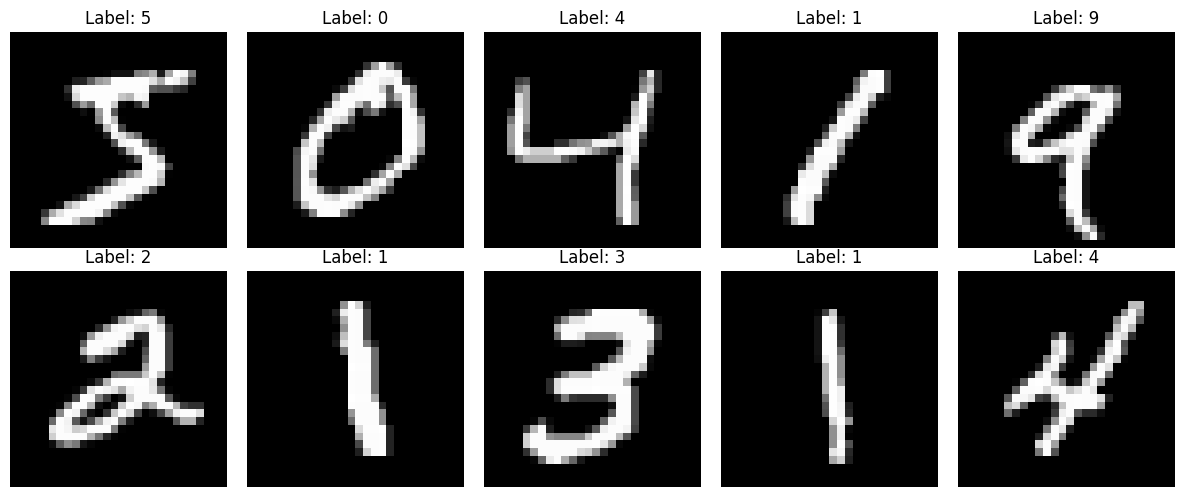

(28, 28)
60000
10000
(28, 28, 1)
[5 0 4 1 9]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 38ms/step - accuracy: 0.9222 - loss: 0.2520 - val_accuracy: 0.9832 - val_loss: 0.0491
Epoch 2/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 34ms/step - accuracy: 0.9854 - loss: 0.0467 - val_accuracy: 0.9852 - val_loss: 0.0408
Epoch 3/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 34ms/step - accuracy: 0.9908 - loss: 0.0317 - val_accuracy: 0.9874 - val_loss: 0.0373
Epoch 4/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.9928 - loss: 0.0248 - val_accuracy: 0.9883 - val_loss: 0.0354
Epoch 5/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 33ms/step - accuracy: 0.9942 - loss: 0.0181 - val_accuracy: 0.9865 - val_loss: 0.0418
Epoch 6/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 87s 35ms/step - accuracy: 0.9963 - loss: 0.0131 - val_accuracy: 0.9892 - val_loss: 0.0338
Epoch 7/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 33ms/step - accuracy: 0.9968 - loss: 0.0103 - val_accuracy: 0.9895 - val_loss: 0.0345
313/313 - 3s - 11ms/step - accuracy: 0.9895 - loss: 0.0345
Test accuracy: 0.9894999

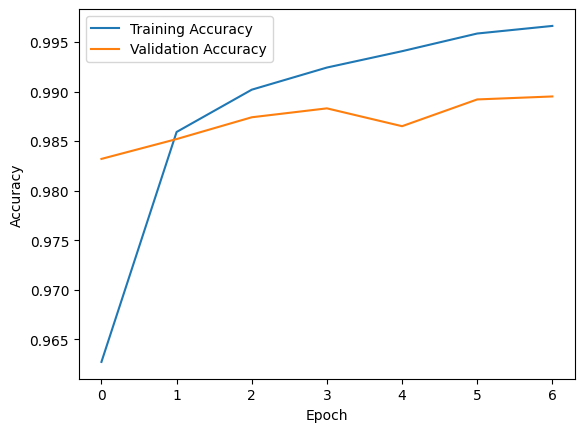

In [1]:
# We will be working with MNIST dataset, so first we visualize a sample of it

import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels),  = mnist.load_data()

# number of rows and columns for the grid
# Means we will be visualizing 2*5 = 10 images
num_rows = 2
num_cols = 5

# Create a grid of images for visualization
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 5))
for i in range(num_rows):
    for j in range(num_cols):
        index = i * num_cols + j
        axes[i, j].imshow(train_images[index], cmap='gray')
        axes[i, j].set_title(f"Label: {train_labels[index]}")
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()

# Normalization of data (grayscale is 0-255)
#TODO data are now on grayscale from 0 to 255, normalize to 0-1
#hint remember that data are now stored as np arrays
# and that you can divide arrays by number


train_images = train_images / 255.0  # Normalize pixel values to [0, 1]
test_images = test_images / 255.0  # Normalize pixel values to [0, 1]



#CNNs are designed to work with multi-dimensional data, such as images,
#which are typically represented as three-dimensional tensors (height x width x channels).
#now we are working with 28x28 images
first_train_sample = train_images[0]
print(first_train_sample.shape)


#there will be only one channel (grayscale)
#Therefore we reshape dataset


print(train_images.shape[0])
print(test_images.shape[0])
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
traintest_images_images = test_images.reshape((test_images.shape[0], 28, 28, 1))


first_train_sample = train_images[0]
print(first_train_sample.shape)

#Multiclassification typically use softmax activation in output layer
#and cross_entropy function as loss
#if we print first elements of labels they are just 1D

print(train_labels[:5])


#we want to have 10D data in "one-hot-encoded" shape
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print(train_labels[:5])

# Building the CNN model
model_cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64),
    layers.Dense(10, activation='softmax')  # Output layer with 10 classesfor 0-9 digits
])

#TODO compile a model
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#model.compile(optimizer=Adam(learning_rate = 0.1), loss='categorical_crossentropy', metrics=['accuracy'])
model_cnn.compile(optimizer=SGD(learning_rate = 0.01, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model_cnn.fit(train_images, train_labels, epochs=7, batch_size=32,
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model_cnn.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

#Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



# Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)):
# 32: This is the number of filters in the convolutional layer. Each filter will learn to detect a specific feature from the input image.
# (3, 3): This is the size of the convolutional filter (kernel). A 3x3 filter scans the input image in small patches of 3x3 pixels.
# activation='relu': This specifies the activation function used by the neurons in this layer. ReLU (Rectified Linear Unit) is used to introduce non-linearity into the model, helping it learn more complex patterns.
# kernel_initializer='he_uniform': This initializes the weights of the layer using He initialization, which is particularly effective for layers with ReLU activation functions.
# input_shape=(28, 28, 1): This defines the shape of the input data. In this case, the input is a 28x28 pixel image with 1 channel (grayscale).

# MaxPooling2D((2, 2)):
# (2, 2): This is the size of the pooling window. Max pooling is a down-sampling operation that reduces the dimensionality of the feature maps by taking the maximum value in each 2x2 window. This helps in reducing the computational complexity and also helps in making the detected features more robust.

# Conv2D(64, (3, 3), activation='relu'):
# 64: This is the number of filters in this convolutional layer, which is higher than the previous layer to learn more complex features.
# (3, 3): This is the size of the convolutional filter.
# activation='relu': This specifies the ReLU activation function used by the neurons in this layer.

# Flatten():
# This layer converts the 2D feature maps from the previous layer into a 1D feature vector. This is necessary to feed the data into the dense (fully connected) layers that follow.

# Dense(64, activation='relu'):
# 64: This is the number of neurons in this dense layer.
# activation='relu': This specifies the ReLU activation function.

# Dense(10, activation='softmax'):
# 10: This is the number of neurons in this dense layer, which corresponds to the number of output classes (0-9 digits in this case).
# activation='softmax': This is the activation function used in this layer. The softmax function converts the raw output scores of the model into probabilities. The probabilities will sum to 1, which makes it easier to interpret the model's output. Each output neuron represents the probability of the input image belonging to one of the 10 classes.


# Summary of the Model
# Input Layer: Receives a 28x28 pixel grayscale image.
# First Conv2D Layer: Applies 32 filters of size 3x3 to the input image, each detecting different features, and applies the ReLU activation function.
# MaxPooling2D Layer: Down-samples the feature maps by taking the maximum value in each 2x2 window.
# Second Conv2D Layer: Applies 64 filters of size 3x3 to the pooled feature maps and applies the ReLU activation function.
# Flatten Layer: Converts the 2D feature maps into a 1D feature vector.
# First Dense Layer: Processes the 1D feature vector using 64 neurons and the ReLU activation function.
# Output Dense Layer: Processes the output from the previous layer using 10 neurons and the softmax activation function to produce probabilities for each of the 10 output classes (digits 0-9).
# This model is designed for image classification tasks, specifically for classifying handwritten digits from the MNIST dataset, where each image is a 28x28 grayscale image of a digit.




# # Improved CNN model
# model_cnn = models.Sequential([
#     layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)),
#     layers.BatchNormalization(),
#     layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Dropout(0.25),
#
#     layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'),
#     layers.BatchNormalization(),
#     layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Dropout(0.25),
#
#     layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform'),
#     layers.BatchNormalization(),
#     layers.MaxPooling2D((2, 2)),
#     layers.Dropout(0.25),
#
#     layers.Flatten(),
#     layers.Dense(128, activation='relu'),
#     layers.BatchNormalization(),
#     layers.Dropout(0.5),
#     layers.Dense(10, activation='softmax')
# ])

# Additional Convolutional Layers: More convolutional layers are added to capture more complex features.
# Batch Normalization: Added after each convolutional layer to normalize the inputs of each layer, which helps in speeding up training and provides some regularization.
# Dropout Layers: Added after pooling layers and dense layers to reduce overfitting.
# Increased Number of Filters: Used more filters in later convolutional layers to capture more detailed features.